In [1]:
# 신경망에서 학습 - 규칙을 만드는 과정
# 직접 : np.random.randn
# 기계

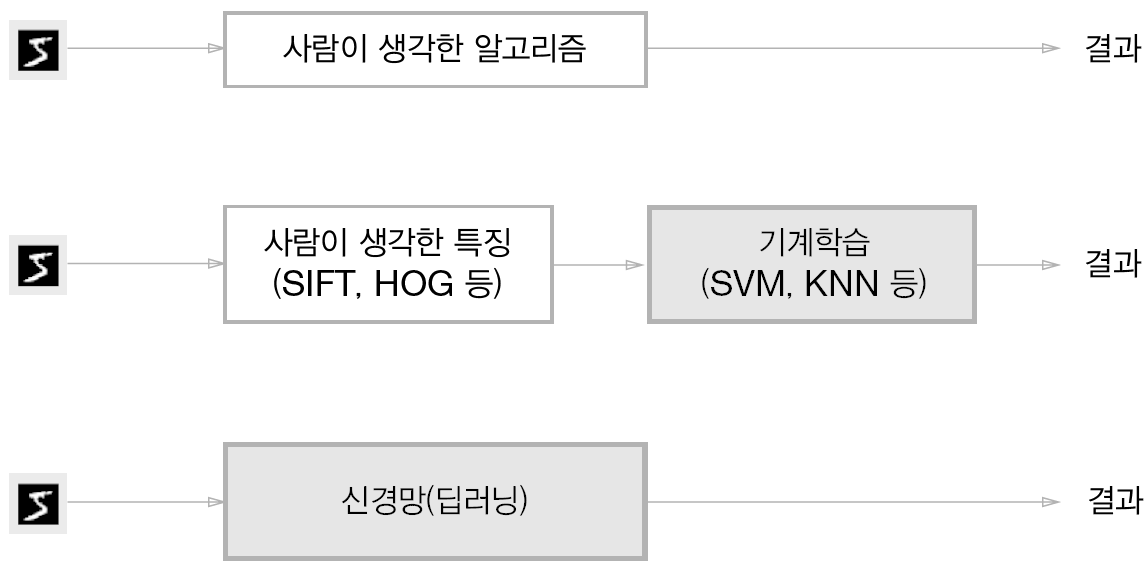

In [2]:
# 학습을 기계 : 검증이필요... 훈련데이터 평가데이터 검증데이터

In [ ]:
# 오버피팅: 한가지특성의 데이터만 지나치게 최적화되는 현상( 데이터 불균형)
# 암환자 1명.. 정상인 99명 인 100개의데이터로 학습 --> 전부 정상만 판단

In [ ]:
# 손실함수 : 신경망에서 학습에 사용하는 지표
# 오차제곱합  sum of squreds for errors

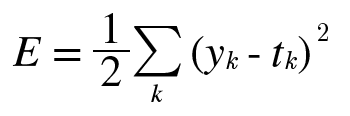

In [3]:
# 손글씨 데이터중에서 추론 y
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] # 소프트 맥스 출력
t = [0,0,1,0,0,0,0,0,0,0] # 정답을 표현 one hot encoding

In [4]:
import numpy as np

In [5]:
# 손실함수 오차제곱합
def sum_squres_error(y, t):
    return 0.5*((np.array(y)-np.array(t))**2).sum()    

In [8]:
t = [0,0,1,0,0,0,0,0,0,0]  # 정답
y1= [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
y2= [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
sum_squres_error(y1,t), sum_squres_error(y2,t)

(0.09750000000000003, 0.5975)

In [ ]:
# 교차 엔트로피

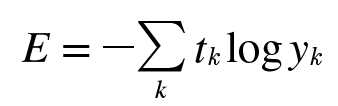

In [27]:
def cross_entropy_error(y,t):
    y = np.array(y)
    t = np.array(t)
    delta = 1e-7  # 굉장히 작은수   0에 로그를 사용하면 무한대가 나오는 것을 방지하기위해
    return -np.sum(t*np.log(y+delta))

In [28]:
# yk는 출력, tk는 정답 --> 원핫인코딩으로 되어 있는 정답

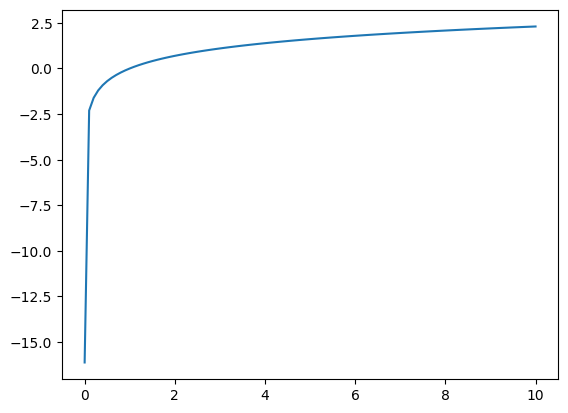

In [29]:
# 자연로그 그래프  y=logx
import matplotlib.pyplot as plt
x = np.arange(0.0,10.1,0.1)
y = np.log(x+ (1e-7))
plt.plot(x,y)

In [30]:
t = [0,0,1,0,0,0,0,0,0,0]  # 정답
y1= [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
y2= [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(y1,t), cross_entropy_error(y2,t)

(0.510825457099338, 2.302584092994546)

In [ ]:
# 학습 : 훈련데이터를 학습하고 손실함수의 값을 구하고, 그 값이 최소가 되는 매개변수를 찾는과정

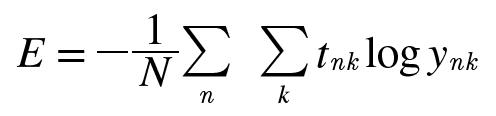

In [31]:
# 미니배치 : 전체데이터에서 일정데이터를 추출해서 학습

In [32]:
from tensorflow.keras.datasets import mnist

In [33]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train =  x_train / 255.
x_test =  x_test / 255.
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [35]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [37]:
from tensorflow.keras.utils import to_categorical

In [39]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

(60000, 10)

In [40]:
np.random.choice(10,20)

array([5, 3, 9, 1, 6, 1, 3, 6, 1, 4, 5, 0, 9, 1, 1, 5, 7, 0, 8, 9])

In [43]:
train_size = x_train.shape[0]
batch_size = 10
batch_idx=  np.random.choice(train_size,batch_size)
x_train[batch_idx], y_train[batch_idx]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))

In [44]:
# 배치용교차엔트로피 함수
def cross_entropy_error(y,t):
    y = np.array(y)
    t = np.array(t)    
    delta = 1e-7  # 굉장히 작은수   0에 로그를 사용하면 무한대가 나오는 것을 방지하기위해
    return -np.sum(t*np.log(y+delta))

In [45]:
# 손실함수를 사용하는 이유
# 정확도를 나두고 손실함수를 쓰는 이유

In [ ]:
# 미분 : 변화량
# 10분에 2km  2 / 10   0.2 km/분  : 평균 속도
# 미분 : 특정순간의 변화량

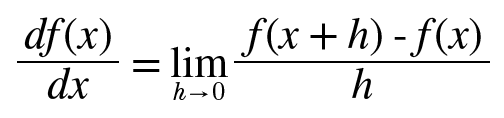

In [81]:
def numerical_diff(f,x):
    h = 1e-4  # 파이썬에서는 반올림 오차
    return (f(x+h)-f(x) ) / h

In [82]:
np.float32(1e-50)  # 파이썬에서는 반올림 오차

0.0

In [83]:
np.float32(1e-4) 

1e-04

In [84]:
# 편미분....

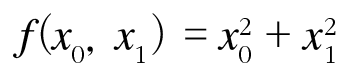

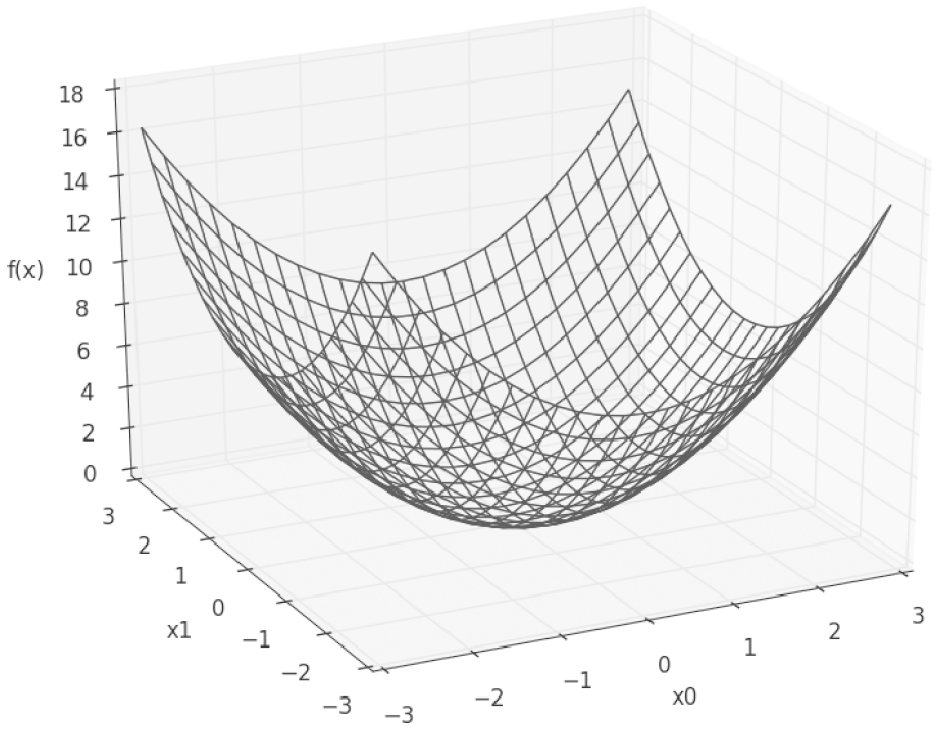

In [85]:
# 변수가 2개중에 어느변수를 미분할것인지  편미분

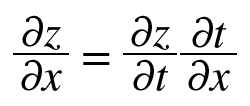

In [86]:
# x0 = 3  x1 =4일대  x0에 대한 편미분을 구해라

In [90]:
x0 = 3; x1 = 4
def ff(x0):
    return x0**2 + x1**2

In [92]:
numerical_diff(ff, 4.0)

8.00009999998963

In [ ]:
# 기울기
# 모든 변수의 편미분을 벡터로 정리한것

In [101]:
def ff(x):
    x = np.array(x)
    return sum(x**2)
def numeric_gradient(f,x):
    h = 1e-4
    x = np.array(x,dtype='float32')
    grad = np.zeros_like(x)
    for idx in range(x.size):
        temp_val = x[idx]
    
        #f(x+h)
        x[idx] = temp_val + h
        fxh1 = f(x)
        
        #f(x-h)
        x[idx] = temp_val-h
        fxh2 = f(x)

        grad[idx] = (fxh1-fxh2) / (2*h)        
    
    return grad

In [103]:
numeric_gradient(ff, np.array([2.0,-0.5]))

array([ 3.9982796, -0.9999424], dtype=float32)

In [98]:
# f(x1,x2) = x1**2 + x2**2

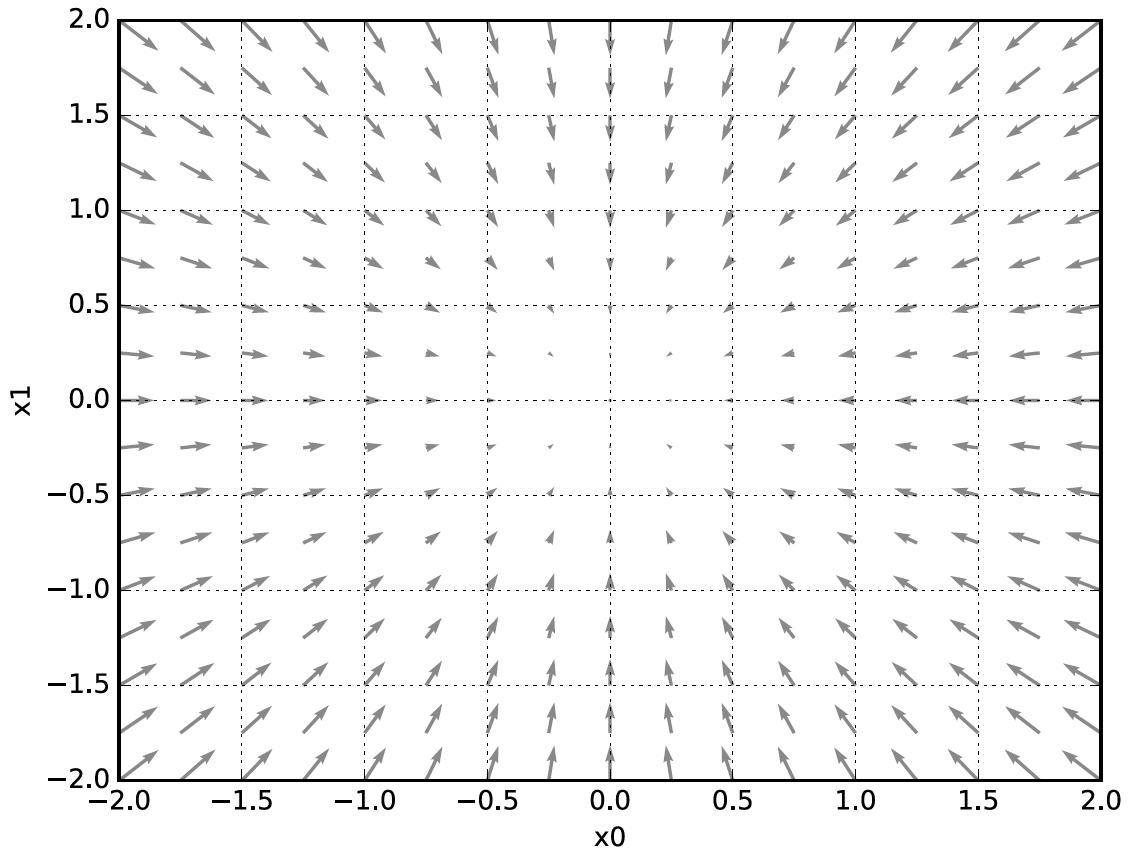

In [99]:
# 최적 : 손실함수들의 값이 최소값이 될때의 매개변수

In [100]:
# 경사법

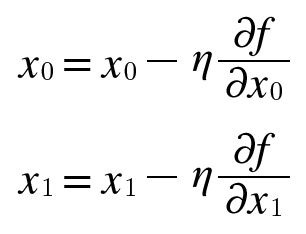

In [104]:
# 에타 : 갱신하는 양 -> 학습률,1회에 해당 하는 수식

In [105]:
def gradient_descent(f,init_x, lr=0.01, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numeric_gradient(f,x)
        x -= lr*grad
    return x

In [106]:
# 경사법으로 f(x0,x1) = x0**2 + x1**2  인 수식의 최소값을 구하시오

In [107]:
def function2(x):
    return x[0]**2 + x[1]**2

In [108]:
init_x = np.array([-3.0,4.0])
gradient_descent(function2,init_x=init_x, lr=0.1, step_num=100)

array([-6.11258558e-10,  8.15538359e-10])

In [109]:
# (0,0)

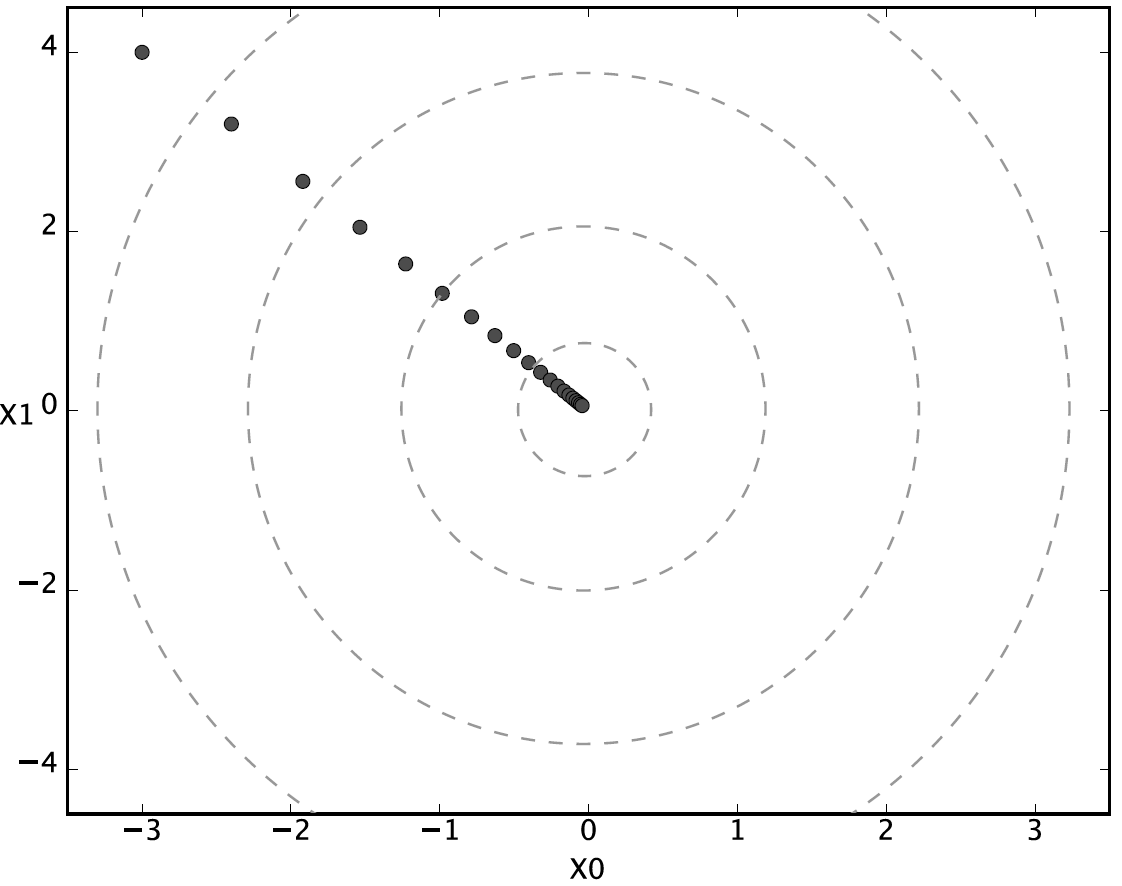

In [110]:
#  학습률이 너무 클때
init_x = np.array([-3.0,4.0])
gradient_descent(function2,init_x=init_x, lr=10.0, step_num=100)

array([ 25111.96784973, -33524.68930054])

In [112]:
#  학습률이 너무 작을때 - 갱신이 이루어지지 않음  학습이 안됨
init_x = np.array([-3.0,4.0])
gradient_descent(function2,init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [ ]:
# 신경망 기울기 - 가중치 매개변수에 대한 손실함수의 기울기
# 가중치W ,  손실함수가 L인 


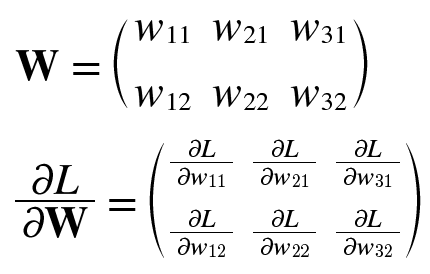

In [113]:
# 간단한 신경망을 만들고 기울기를 구하는 코드

In [117]:
def softmax(x):
    c = np.max(x)
    exp = np.exp(x - c)  # 오버플로우 방지
    exp_sum = np.sum(exp)
    return exp / exp_sum
def relu(x):
    return np.maximum(0,x)

class simpleNet:
    def __init__(self):
        self.w = np.random.randn(2,3)
    def predict(self, x):
        return relu(np.dot(x,self.w))
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss   

In [116]:
net = simpleNet()
net.w

array([[ 0.85607906, -0.95278716, -0.27605636],
       [-1.45837475,  0.37053038, -0.52105835]])

In [133]:
x = np.array([0.6,0.9])
p = net.predict(x)
p, softmax(p)

(array([-0.79888984, -0.23819495, -0.63458633]),
 array([0.25442306, 0.44572106, 0.29985588]))

In [119]:
np.argmax(p)

1

In [120]:
# 정답 레이블
t = np.array([0,0,1])
net.loss(x,t)

1.204452988194571

In [122]:
# 기울기 구하기

In [136]:
def f(x):
    return net.loss(x,t)

In [141]:
dw = numeric_gradient(f,x)
dw

array([-0.01359404,  0.15900497], dtype=float32)

In [143]:
# 학습알고리즘 구현
# 가중치 편향 이 파라메터들을 이용해서 손실값이 최소가 되도록 가중치와 편향을 조정하는 과정
# 4단계로 수행함

In [144]:
# 1. 미니배치 - 무작위로 데이터 추출
# 2. 기울기 산출 - 손실함수의 값을 줄이기 위해서 각 가중치 매개변수의 기울기를 구함
# 3. 매개변수 갱신 - 가중치를 구한 기울기 방향으로 조금씩(러닝레이트) 갱신
# 1 ~ 3 반복